In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt # For Visuallization of Graphs
import seaborn as sns # For Visualization Of Graphs 

In [3]:
import plotly.express as px # For Visualization Of Graphs.
import cufflinks as cf # For Visualization Of Graphs.
cf.set_config_file(offline=True)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_GooglePlay = pd.read_csv('googleplaystore.csv')

In [6]:
df_GooglePlay.shape

(10841, 13)

In [7]:
df_GooglePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
df_GooglePlay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

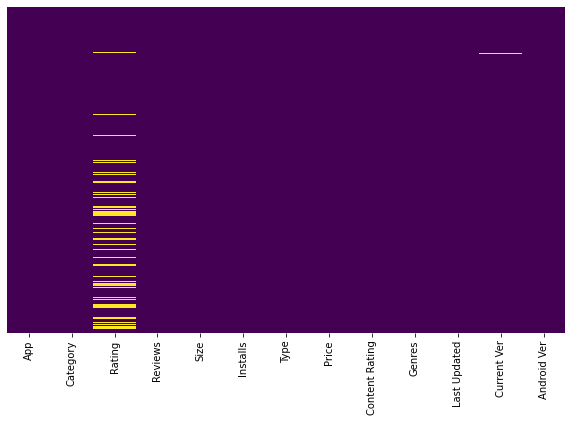

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_GooglePlay.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

In [10]:
def missingvalue():
    gpm = pd.DataFrame(index=df_GooglePlay.columns)
    gpm['data_type'] = df_GooglePlay.dtypes
    gpm['null_count'] = df_GooglePlay.isnull().sum()
    gpm['unique_count'] = df_GooglePlay.nunique()
    return gpm

In [11]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [12]:
rating_mvh = df_GooglePlay['Rating'].mode()

In [13]:
rating_mvh[0]

4.4

In [14]:
df_GooglePlay['Rating'].fillna(value=rating_mvh[0], inplace = True)

In [15]:
df_GooglePlay.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [16]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,0,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [17]:
df_GooglePlay.dropna(subset = ['Content Rating'], inplace=True)

In [18]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,1,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [19]:
df_GooglePlay[df_GooglePlay.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.4,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [20]:
df_GooglePlay['Type'].fillna("Free", inplace = True)

In [21]:
df_GooglePlay.drop(['Current Ver'], axis=1, inplace=True)

In [22]:
df_GooglePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device


In [23]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


<AxesSubplot:>

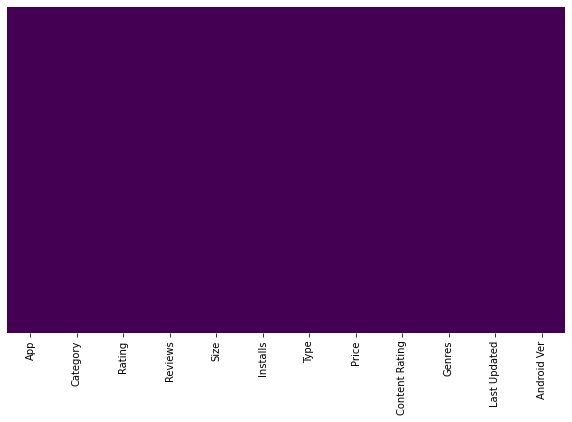

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df_GooglePlay.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

In [25]:
df_GooglePlay['Size'] = df_GooglePlay.Size.apply(lambda x: x.strip('+')) 

In [26]:
df_GooglePlay['Size'] = df_GooglePlay.Size.apply(lambda x: x.replace(',', ''))

In [27]:
df_GooglePlay['Size'] = df_GooglePlay.Size.apply(lambda x: x.replace('M', 'e+6'))

In [28]:
df_GooglePlay['Size'] = df_GooglePlay.Size.apply(lambda x: x.replace('k', 'e+3'))

In [29]:
df_GooglePlay['Size'] = df_GooglePlay.Size.replace('Varies with device', np.NaN)

In [30]:
df_GooglePlay['Size'] = pd.to_numeric(df_GooglePlay['Size'])

In [31]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [32]:
df_GooglePlay.dropna(subset = ['Size'], inplace=True)

In [33]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [34]:
df_GooglePlay['Installs'] = df_GooglePlay.Installs.apply(lambda x: x.strip('+'))

In [35]:
df_GooglePlay['Installs'] = df_GooglePlay.Installs.apply(lambda x: x.replace(',', ''))

In [36]:
df_GooglePlay['Installs'] = pd.to_numeric(df_GooglePlay['Installs'])

In [37]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [38]:
df_GooglePlay['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [39]:
df_GooglePlay['Price'] = df_GooglePlay.Price.apply(lambda x: x.strip('$'))

In [40]:
df_GooglePlay['Price'].value_counts()

0         8421
0.99       145
2.99       114
1.99        66
4.99        65
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 87, dtype: int64

In [41]:
df_GooglePlay['Price'] = pd.to_numeric(df_GooglePlay['Price'])

In [42]:
missingvalue()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [43]:
df_GooglePlay.shape

(9145, 12)

In [44]:
df_GooglePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business,"September 29, 2016",4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",2.2 and up


In [45]:
df_GooglePlay.to_csv("Cleaned_Data_Google_Play_Store_13_Col.csv")

In [46]:
df_GooglePlay.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Android Ver        object
dtype: object